### Deloitte task

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Measurements Dataset.csv')

### Visualizing the first 5 rows of the dataset 

In [3]:
df.head()

,Unnamed: 0,date,location,IP address,component,interaction,duration,downtime
0,0,2021-08-18,"950 Rebecca Ranch Suite 170\nNew Scott, NH 81801",165.61.147.242,mongodb database,other,16.90,13.89
1,1,2021-06-08,"55068 Kyle Centers\nNorth Jenniferhaven, HI 44276",159.146.10.26,sap shipping management system,invalid SAP unit code,80.96,0.00
2,2,2021-08-01,"60517 Richard Lake\nLake Lori, NJ 37360",129.94.76.202,sap shipping management system,server error,49.47,0.00
3,3,2021-08-03,"829 Cox Ferry\nNicholasshire, VA 23634",49.137.245.5,django controller,HTTP 401 response,2.56,0.00
4,4,2021-08-10,"940 Odom Lodge\nTimothyburgh, AZ 75746",172.200.143.223,ios frontend,dormant,47.26,0.00


### Shape of the dataset (number of rows and columns)

In [4]:
df.shape

(7566, 8)

### Dataset info

In total the dataset has 7566 rows and 8 columns. There is no missing values according to this summary. 

Dtypes for this dataset are: float (2 columns), integer(1 column), object(5 columns)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   7566 non-null   int64  
 1   date         7566 non-null   object 
 2   location     7566 non-null   object 
 3   IP address   7566 non-null   object 
 4   component    7566 non-null   object 
 5   interaction  7566 non-null   object 
 6   duration     7566 non-null   float64
 7   downtime     7566 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 473.0+ KB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   7566 non-null   int64  
 1   date         7566 non-null   object 
 2   location     7566 non-null   object 
 3   IP address   7566 non-null   object 
 4   component    7566 non-null   object 
 5   interaction  7566 non-null   object 
 6   duration     7566 non-null   float64
 7   downtime     7566 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 473.0+ KB


In [7]:
df.describe()

,Unnamed: 0,duration,downtime
count,7566.000000,7566.000000,7566.000000
mean,3782.500000,49.055133,25.154978
std,2184.260401,28.637389,30.581321
min,0.000000,0.010000,0.000000
25%,1891.250000,23.950000,0.000000
50%,3782.500000,49.035000,10.815000
75%,5673.750000,73.967500,46.097500
max,7565.000000,99.000000,98.970000


### Create a new column with percentage of the interaction duration that resulted in downtime

In [8]:
df['downtime_perc'] = (df['downtime'] / df['duration']) *100

df.head()

,Unnamed: 0,date,location,IP address,component,interaction,duration,downtime,downtime_perc
0,0,2021-08-18,"950 Rebecca Ranch Suite 170\nNew Scott, NH 81801",165.61.147.242,mongodb database,other,16.90,13.89,82.189349
1,1,2021-06-08,"55068 Kyle Centers\nNorth Jenniferhaven, HI 44276",159.146.10.26,sap shipping management system,invalid SAP unit code,80.96,0.00,0.000000
2,2,2021-08-01,"60517 Richard Lake\nLake Lori, NJ 37360",129.94.76.202,sap shipping management system,server error,49.47,0.00,0.000000
3,3,2021-08-03,"829 Cox Ferry\nNicholasshire, VA 23634",49.137.245.5,django controller,HTTP 401 response,2.56,0.00,0.000000
4,4,2021-08-10,"940 Odom Lodge\nTimothyburgh, AZ 75746",172.200.143.223,ios frontend,dormant,47.26,0.00,0.000000


In [9]:
df['component'].unique()

array(['mongodb database', 'sap shipping management system',
       'django controller', 'ios frontend', 'android frontend',
       'ai engine', 'web frontend', 'shipping database',
       'customer database'], dtype=object)

### Visualizing the values of the column 'component' using a countplot from Seaborn. 

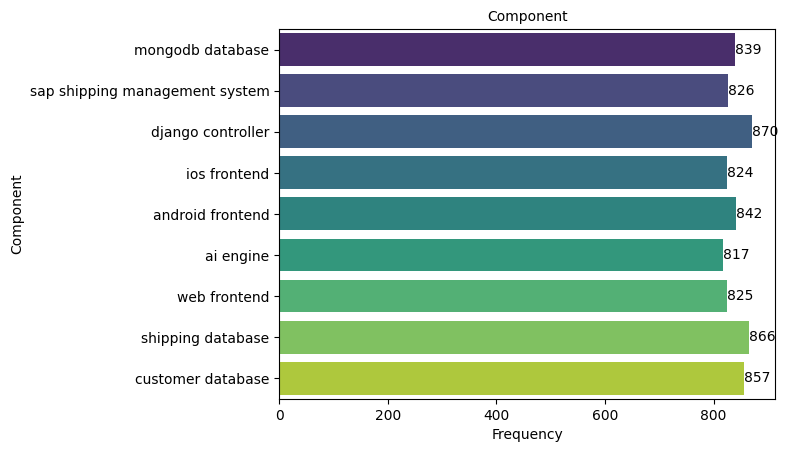

In [10]:
ax = sns.countplot(data=df, y="component", palette='viridis')

plt.title("Component", fontsize=10)
plt.xlabel("Frequency", fontsize=10)
plt.ylabel("Component", fontsize=10)
ax.bar_label(ax.containers[0], fontsize=10);


### Using a barplot,

We can see each component(that was interacted with by the client) and average downtime percentage. 

- Downtime is the reported time in seconds that this interaction by the client caused in 
system downtime. Therefore, downtime is the amount of time that this component has been 
deemed unusable or vulnerable to a hack, malicious damage or threat.

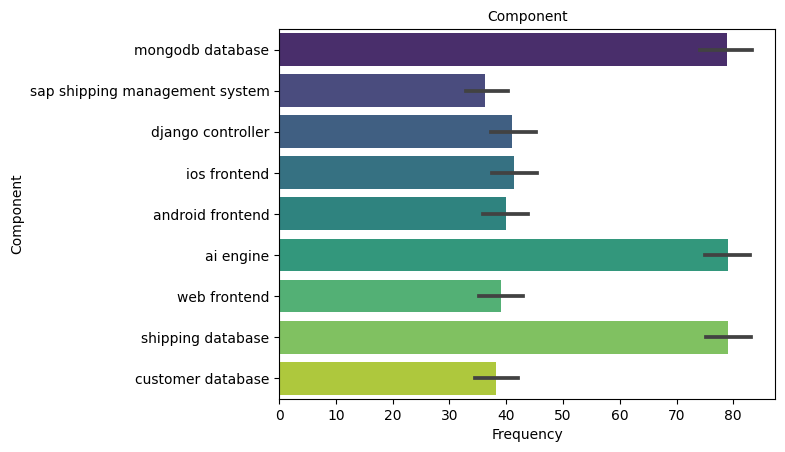

In [11]:
ax = sns.barplot(data=df, y="component", x='downtime_perc', palette='viridis');
plt.title("Component", fontsize=10)
plt.xlabel("Frequency", fontsize=10)
plt.ylabel("Component", fontsize=10);



                        component  downtime_perc
0                       ai engine      79.101679
7               shipping database      78.999202
5                mongodb database      78.884416
4                    ios frontend      41.455761
3               django controller      41.043794
1                android frontend      39.889766
8                    web frontend      39.053057
2               customer database      38.232598
6  sap shipping management system      36.303809


AttributeError: 'tuple' object has no attribute 'bar_label'

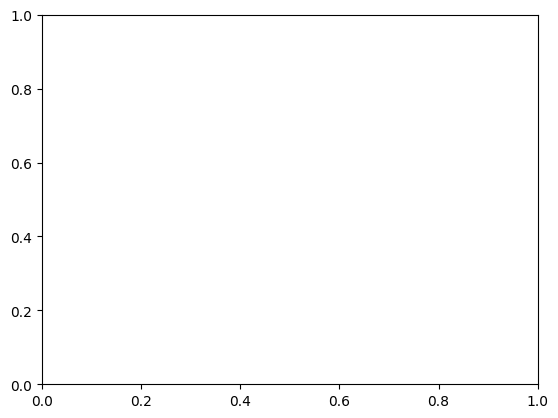

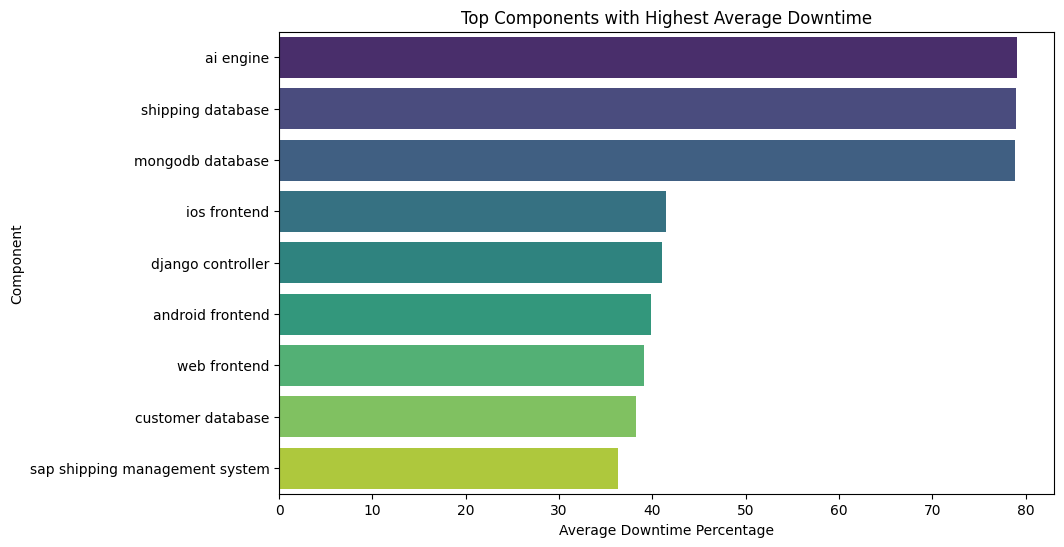

In [21]:
#Calculate the average downtime percentage per component
downtime_summary = df.groupby('component')['downtime_perc'].mean().reset_index()

#sort the components by average downtime percentage in descending order
downtime_summary = downtime_summary.sort_values(by='downtime_perc', ascending=False)

#components with the highest average downtime percentage
top_components = downtime_summary.head(10)
print(top_components)

#visualizing the top components

plt.subplots()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_components, x='downtime_perc', y='component', palette='viridis')
plt.title('Top Components with Highest Average Downtime')
plt.xlabel('Average Downtime Percentage')
plt.ylabel('Component')
ax.bar_label(ax.containers[0], fontsize=10);
plt.show()



In [14]:
#Set date column as Datetime index 
df = df.set_index('date')
df.head()

,Unnamed: 0,location,IP address,component,interaction,duration,downtime,downtime_perc
date,,,,,,,,
2021-08-18,0,"950 Rebecca Ranch Suite 170\nNew Scott, NH 81801",165.61.147.242,mongodb database,other,16.90,13.89,82.189349
2021-06-08,1,"55068 Kyle Centers\nNorth Jenniferhaven, HI 44276",159.146.10.26,sap shipping management system,invalid SAP unit code,80.96,0.00,0.000000
2021-08-01,2,"60517 Richard Lake\nLake Lori, NJ 37360",129.94.76.202,sap shipping management system,server error,49.47,0.00,0.000000
2021-08-03,3,"829 Cox Ferry\nNicholasshire, VA 23634",49.137.245.5,django controller,HTTP 401 response,2.56,0.00,0.000000
2021-08-10,4,"940 Odom Lodge\nTimothyburgh, AZ 75746",172.200.143.223,ios frontend,dormant,47.26,0.00,0.000000


### Decision

The 3 areas of LogisticAI technology architecture are most at risk: AI engine, Shipping database and Mongodb database.
    
The 3 components that are risky has been identified based on the highest average of downtime percentage column. The Downtime is the reported time in seconds that this interaction by the client caused in 
system downtime. Therefore, downtime is the amount of time that this component has been deemed unusable or vulnerable to a hack, malicious damage or threat.

Because Logistic AI is a technology company that provides software for shipping companies and helping them to optimize routes for ships 
that transport good across the ocean, these 3 components are essential to keep and maintain their technology architeture. 
                                                                                                                   
The AI engine, Shipping database and Mongodb database has over 50% of downtime when compared to other components of the techonology structure like for example the customer database that are below 50% downtime. 
AI Engine - 79.10%
Shipping database - 78.99% 
Mongodb database - 78.88%

    
I would say these components are most important to the company because the shipping database is where the company store huge amount of data related to the shipping routes, historical journeys, scheduled shipping journeys 
and shipping alerts, they supply their technology with huge amount of data. Also, AI engine - it will use their functions to optimize the shipping routes, it will use the database info provided by the Django controller. 
Finally, MongoDB is the database in which the trained machine learning models, their metadata and the parameters used within these models has been stored. It is very important that LogisticAI keep their technology updated and accurate because they deal with different clients in different locations and they need to follow these rules accordingly. 


LogisticAI has been invested heavily in data privacy and security and it is important that the company follow the regulations and apply best practices
accordingly to keep the integrity of their service to their clients. 




                                                                                                                   
                                                                                                                   
    

### 
The first slide must be an executive summary slide, which includes key points about your insights and next steps for the client and Deloitte. 

Use the accompanying video resource that explains how to create an executive summary slide.
    
The second slide should include a clear summary of the 3 components that are most at risk, showing evidence of why this is the case and their potential 
impact on the rest of the technology architecture if they were to go down completely.